In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df=pd.read_csv("data/restaurant_data.csv")
df.head()

,Name,Location,Cuisine,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Parking Availability,Weekend Reservations,Weekday Reservations,Revenue
0,Restaurant 0,Rural,Japanese,4.0,38,73.98,2224,23406,13,185,161.924906,1.3,7.0,Yes,13,4,638945.52
1,Restaurant 1,Downtown,Mexican,3.2,76,28.11,4416,42741,8,533,148.759717,2.6,3.4,Yes,48,6,490207.83
2,Restaurant 2,Rural,Italian,4.7,48,48.29,2796,37285,18,853,56.849189,5.3,6.7,No,27,14,541368.62
3,Restaurant 3,Rural,Italian,4.4,34,51.55,1167,15214,13,82,205.433265,4.6,2.8,Yes,9,17,404556.80
4,Restaurant 4,Downtown,Japanese,4.9,88,75.98,3639,40171,9,78,241.681584,8.6,2.1,No,37,26,1491046.35


In [3]:
df.shape

(8368, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [5]:
df.dtypes

Name                       object
Location                   object
Cuisine                    object
Rating                    float64
Seating Capacity            int64
Average Meal Price        float64
Marketing Budget            int64
Social Media Followers      int64
Chef Experience Years       int64
Number of Reviews           int64
Avg Review Length         float64
Ambience Score            float64
Service Quality Score     float64
Parking Availability       object
Weekend Reservations        int64
Weekday Reservations        int64
Revenue                   float64
dtype: object

In [6]:
df.describe()

,Rating,Seating Capacity,Average Meal Price,Marketing Budget,Social Media Followers,Chef Experience Years,Number of Reviews,Avg Review Length,Ambience Score,Service Quality Score,Weekend Reservations,Weekday Reservations,Revenue
count,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8368.000000,8.368000e+03
mean,4.008258,60.212835,47.896659,3218.254900,36190.621773,10.051984,523.010397,174.769974,5.521283,5.508772,29.491754,29.235301,6.560706e+05
std,0.581474,17.399488,14.336767,1824.896053,18630.153330,5.516606,277.215127,71.998060,2.575442,2.586552,20.025415,20.004277,2.674137e+05
min,3.000000,30.000000,25.000000,604.000000,5277.000000,1.000000,50.000000,50.011717,1.000000,1.000000,0.000000,0.000000,1.847085e+05
25%,3.500000,45.000000,35.490000,1889.000000,22592.500000,5.000000,277.000000,113.311102,3.300000,3.200000,13.000000,13.000000,4.546514e+05
50%,4.000000,60.000000,45.535000,2846.500000,32518.500000,10.000000,528.000000,173.910079,5.500000,5.600000,27.000000,26.000000,6.042421e+05
75%,4.500000,75.000000,60.300000,4008.500000,44566.250000,15.000000,764.250000,237.406885,7.800000,7.800000,43.000000,43.000000,8.130942e+05
max,5.000000,90.000000,76.000000,9978.000000,103777.000000,19.000000,999.000000,299.984924,10.000000,10.000000,88.000000,88.000000,1.531868e+06


In [7]:
df.duplicated().any()

False

In [8]:
df.isnull().sum()

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64

In [9]:
cat_cols=df.select_dtypes(include="object").columns

for col in cat_cols:
    if df[col].nunique()<10:
        print(col,"-",df[col].nunique(),"-",df[col].unique())
    else:
        print(col,"-",df[col].nunique())

Name - 8368
Location - 3 - ['Rural' 'Downtown' 'Suburban']
Cuisine - 6 - ['Japanese' 'Mexican' 'Italian' 'Indian' 'French' 'American']
Parking Availability - 2 - ['Yes' 'No']


In [10]:
num_cols=df.select_dtypes(include="number").columns

for col in num_cols:
    if df[col].nunique()<10:
        print(col,"-",df[col].nunique(),"-",df[col].unique())
    else:
        print(col,"-",df[col].nunique())

Rating - 21
Seating Capacity - 61
Average Meal Price - 3966
Marketing Budget - 4396
Social Media Followers - 7799
Chef Experience Years - 19
Number of Reviews - 949
Avg Review Length - 8368
Ambience Score - 91
Service Quality Score - 91
Weekend Reservations - 89
Weekday Reservations - 89
Revenue - 8368


Downtown    2821
Suburban    2785
Rural       2762
Name: Location, dtype: int64


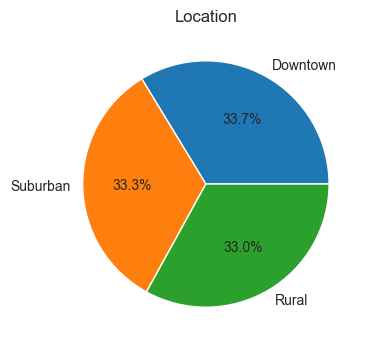

French      1433
American    1416
Italian     1413
Mexican     1393
Indian      1369
Japanese    1344
Name: Cuisine, dtype: int64


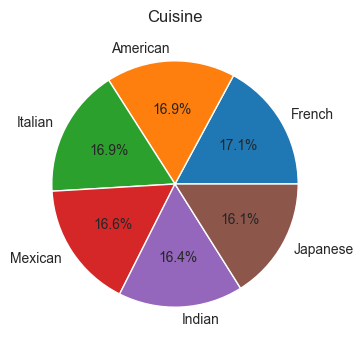

Yes    4189
No     4179
Name: Parking Availability, dtype: int64


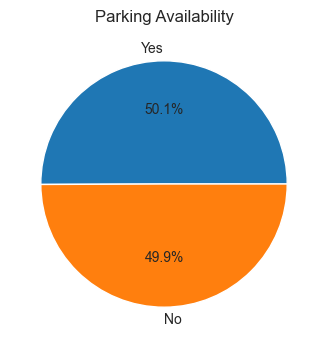

In [11]:
for col in cat_cols:
    if df[col].nunique()<10:
        print(df[col].value_counts())
        plt.figure(figsize=[6,4])
        plt.pie(df[col].value_counts(), labels=df[col].value_counts().index, autopct='%1.1f%%')
        plt.title(col)
        plt.show()

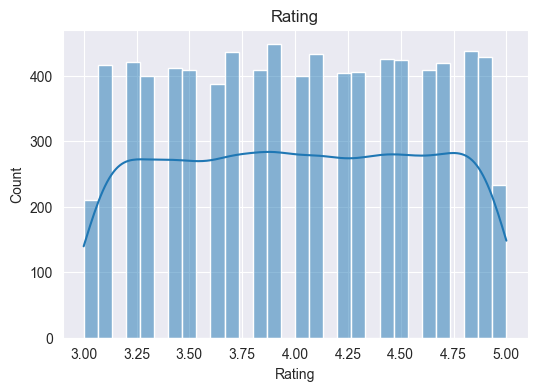

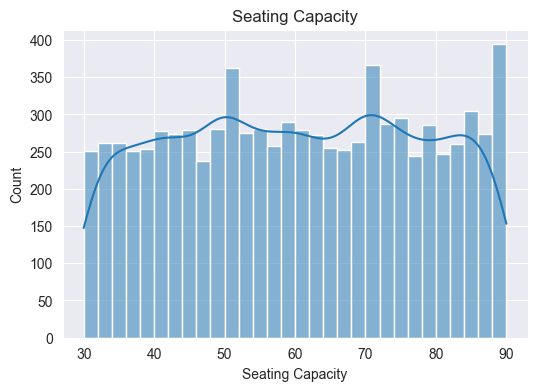

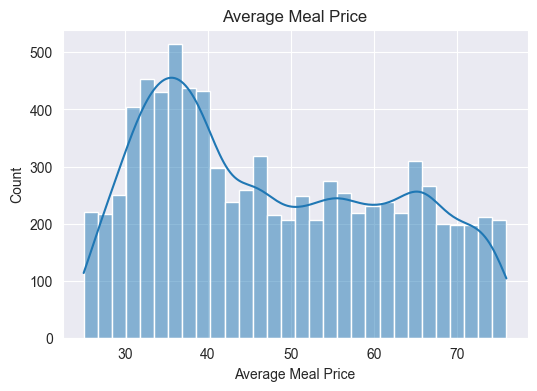

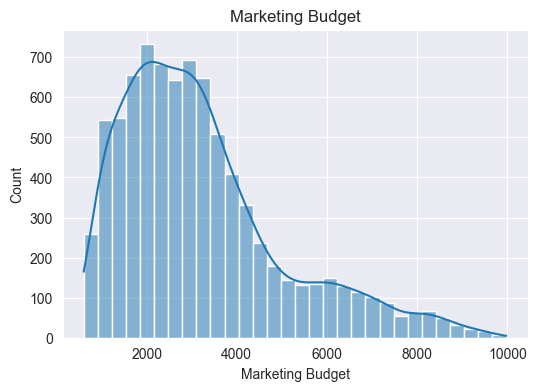

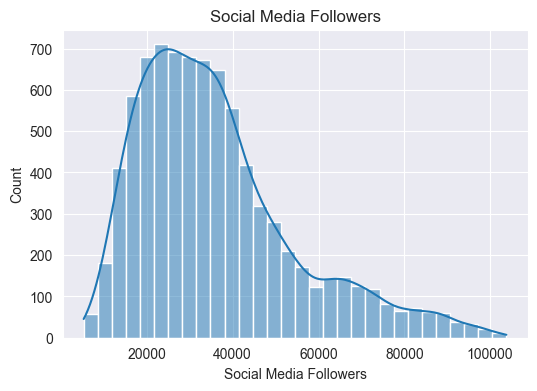

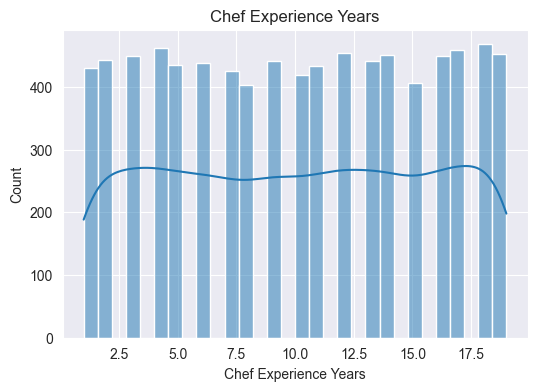

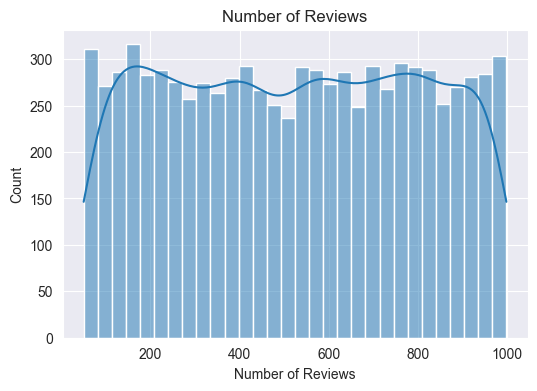

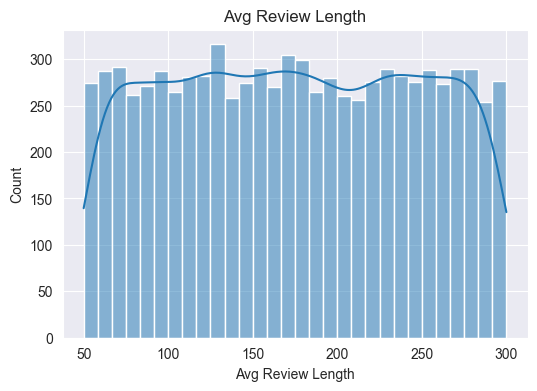

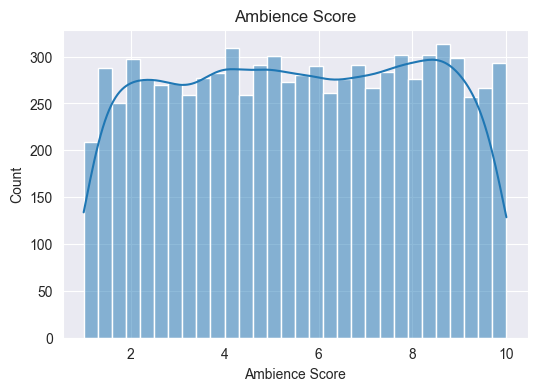

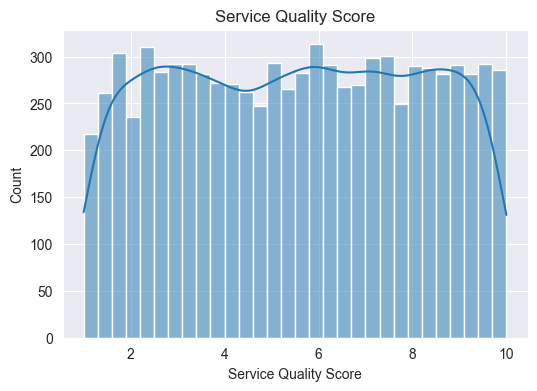

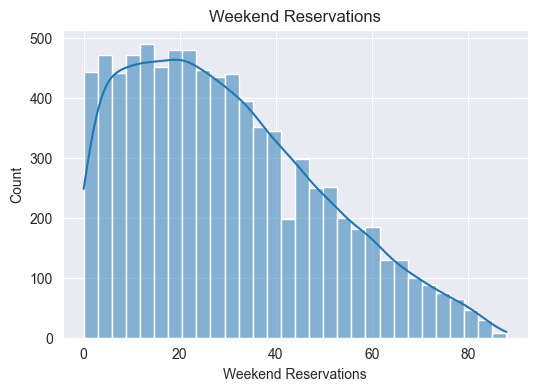

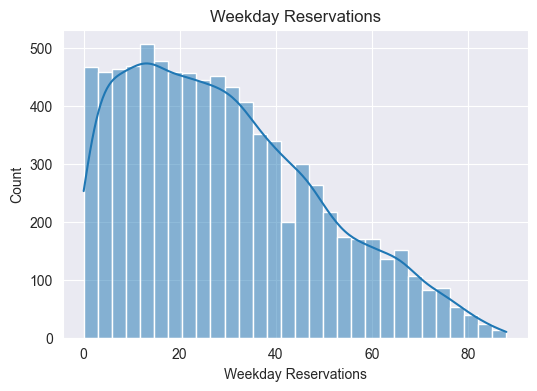

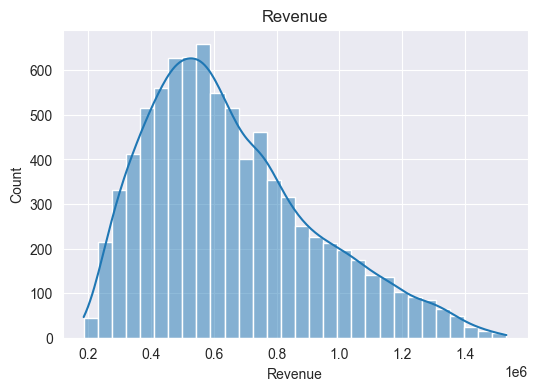

In [12]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
    plt.show()

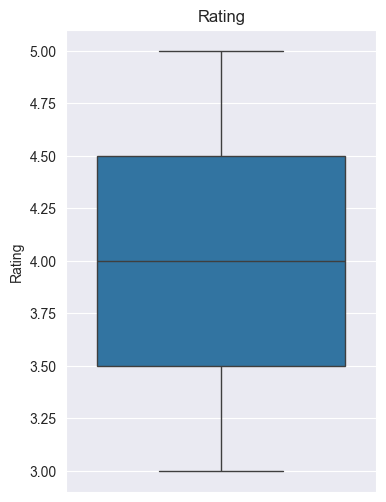

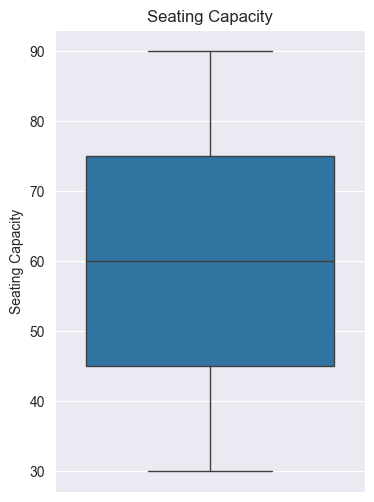

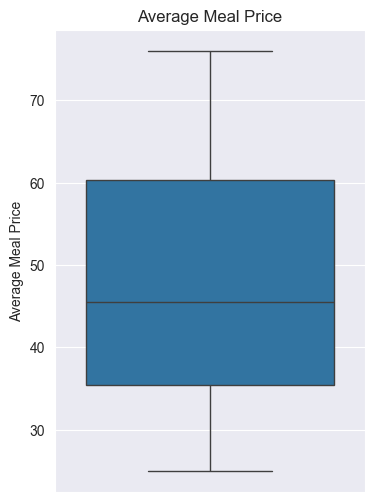

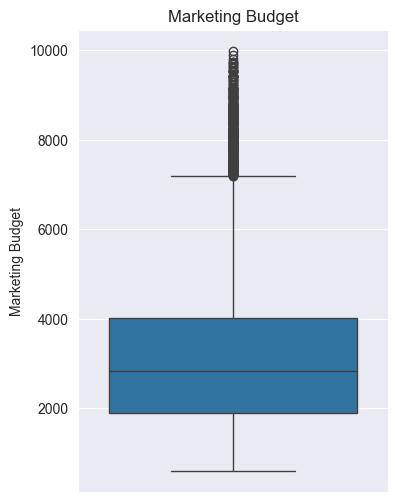

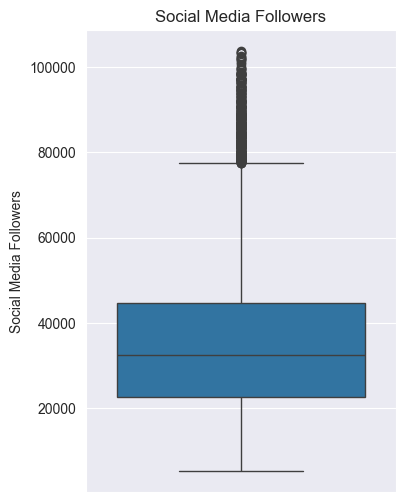

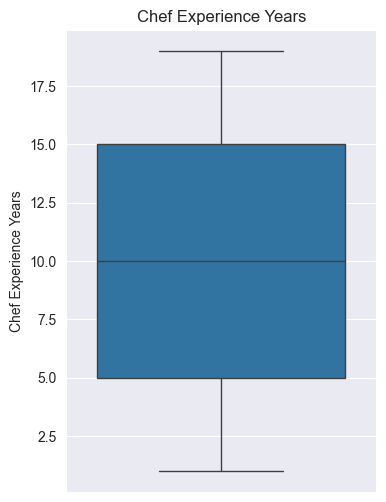

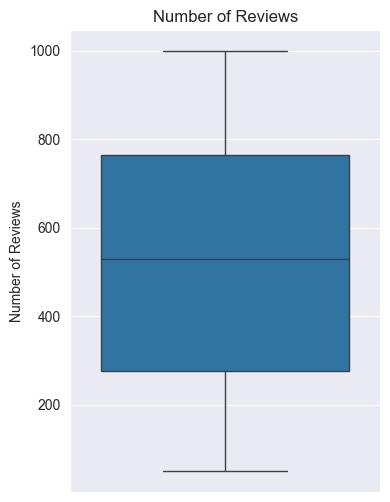

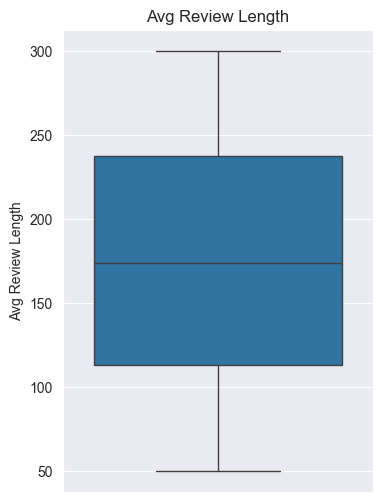

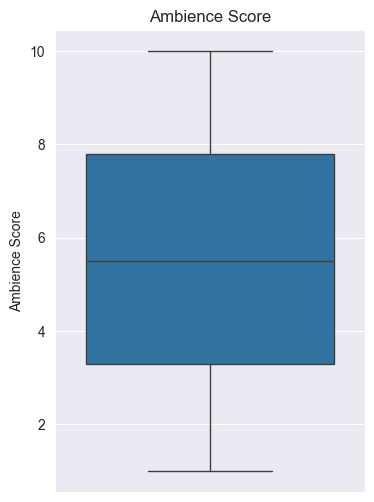

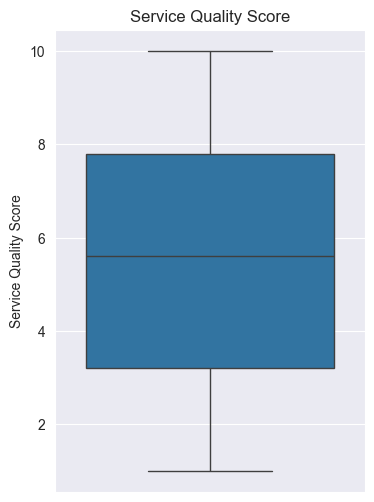

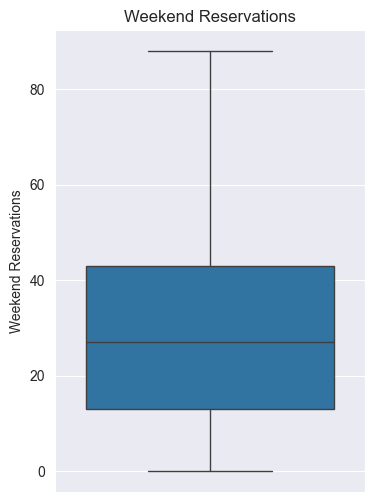

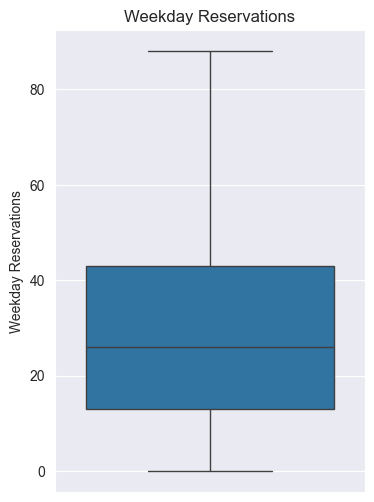

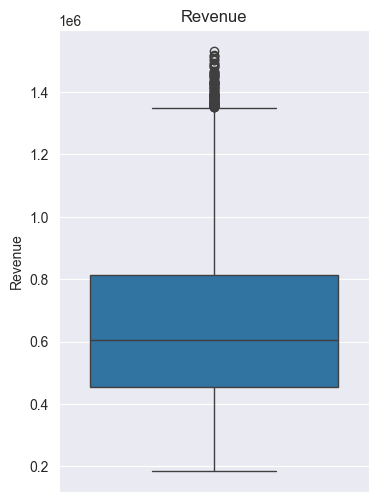

In [13]:
for col in num_cols:
    plt.figure(figsize=(4,6))
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.show()

In [14]:
from scipy.stats import f_oneway

for col in cat_cols:
    if df[col].nunique() < 10:
        groups = [group['Revenue'].values for name, group in df.groupby(col)]
        print(col, f_oneway(*groups))

# Biến phân loại có ảnh hưởng tới Revenue: Location,Cuisine

Location F_onewayResult(statistic=2847.4366933232877, pvalue=0.0)
Cuisine F_onewayResult(statistic=1345.2155148006175, pvalue=0.0)
Parking Availability F_onewayResult(statistic=0.10530866937643814, pvalue=0.7455578159251848)


In [15]:
corr = df[num_cols].corr()
corr['Revenue'].sort_values(ascending=False)

# Biến số có ảnh hưởng tới Revenue: Average Meal Price, Seating Capacity

Revenue                   1.000000
Average Meal Price        0.686365
Seating Capacity          0.677317
Marketing Budget          0.365322
Social Media Followers    0.354466
Weekend Reservations      0.292400
Weekday Reservations      0.273284
Chef Experience Years     0.026899
Rating                    0.009899
Service Quality Score     0.005375
Ambience Score            0.003388
Number of Reviews        -0.008233
Avg Review Length        -0.011278
Name: Revenue, dtype: float64

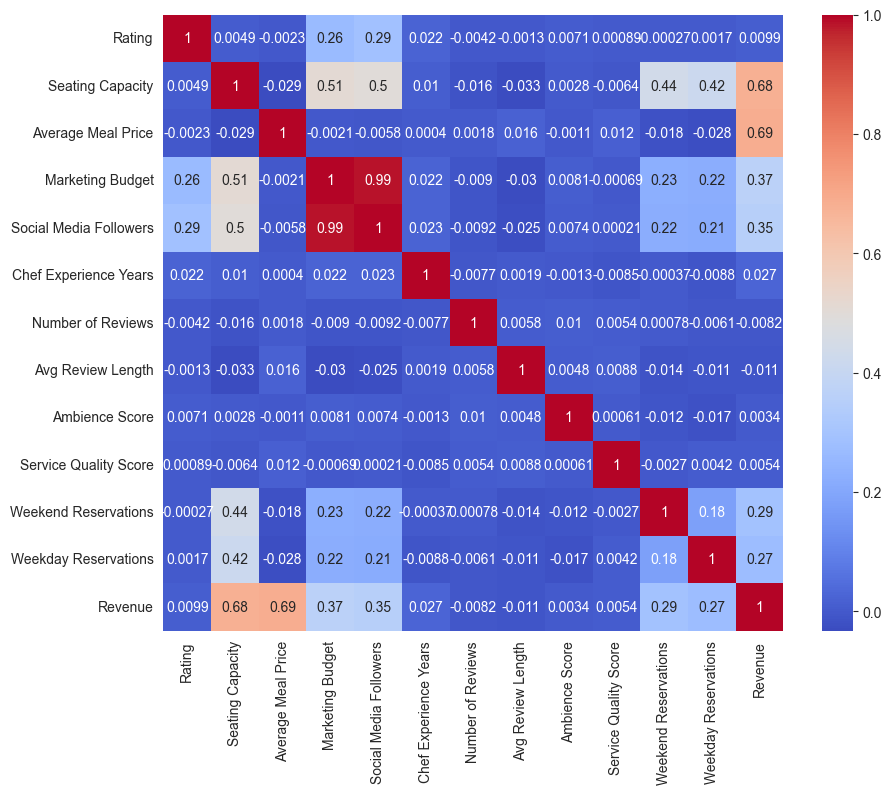

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

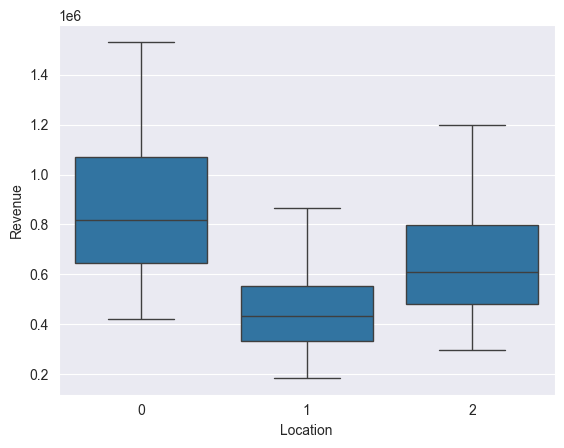

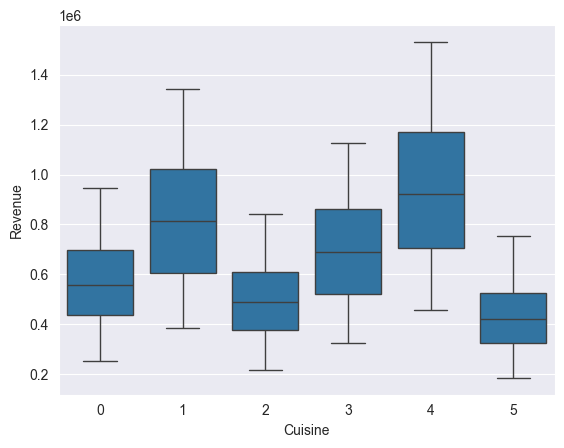

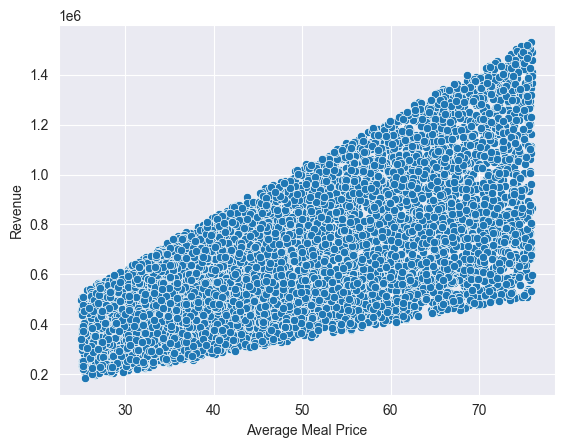

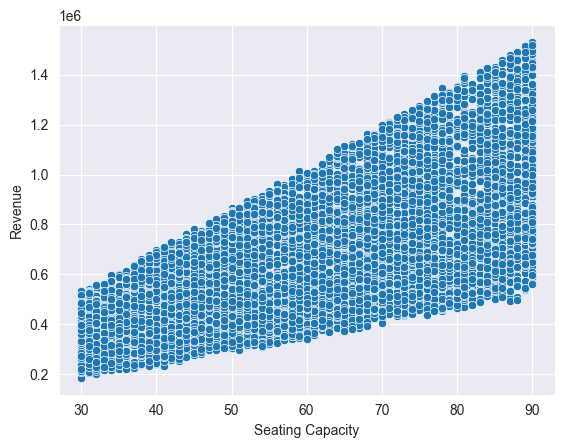

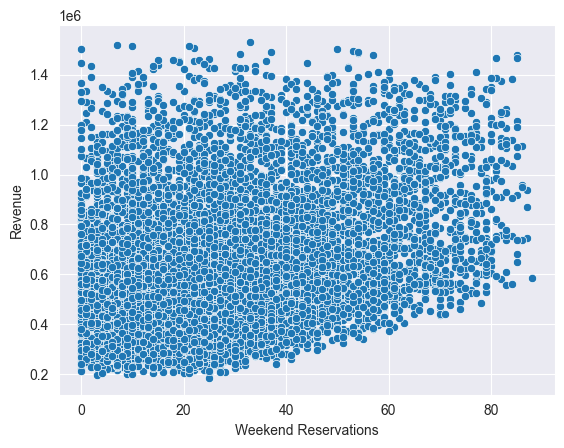

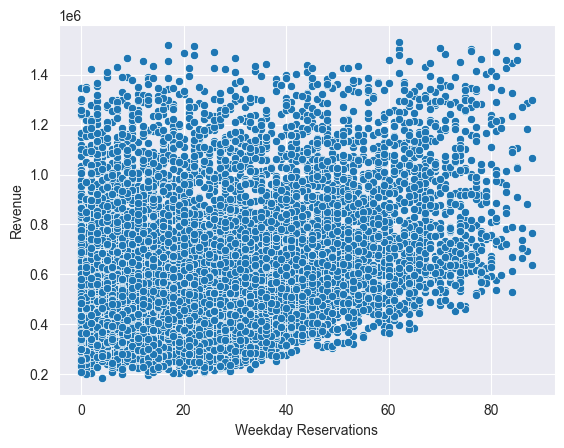

In [29]:
sns.boxplot(data= df,x="Location",y="Revenue")
plt.show()

sns.boxplot(data= df,x="Cuisine",y="Revenue")
plt.show()

sns.scatterplot(data= df,x="Average Meal Price",y="Revenue")
plt.show()

sns.scatterplot(data=df,x="Seating Capacity",y="Revenue")
plt.show()

sns.scatterplot(data=df,x="Weekend Reservations",y="Revenue")
plt.show()

sns.scatterplot(data=df,x="Weekday Reservations",y="Revenue")
plt.show()

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [19]:
# Location: Downtown=0, Rural=1, Suburban=2
# Cuisine: American=0 French=1, Indian=2, Italian=3, Japanese=4, Mexican=5
df["Location"] = le.fit_transform(df["Location"])
df["Cuisine"] = le.fit_transform(df["Cuisine"])

In [20]:
X=df[["Location","Cuisine","Average Meal Price","Seating Capacity","Weekend Reservations","Weekday Reservations"]]
y = df["Revenue"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [32]:
print('The full R-square is:', model.score(X,y))
print('The train R-square is:', model.score(X_train,y_train))
print('The test R-square is:', model.score(X_test,y_test))

The full R-square is: 0.9574324014489425
The train R-square is: 0.9579413890706283
The test R-square is: 0.9553991794553336


In [25]:
print("Coefficient : ", model.coef_)
print("Intercept : ", model.intercept_)

Coefficient :  [-4.83869365e+02 -4.12856418e+02  1.32260067e+04  1.06825432e+04
  2.38901276e+01 -7.09816441e-01]
Intercept :  -619526.8433839355
